# Árvore de decisão

### Base de dados: Clima-Nominal

Ilustra o funcionamento do algoritmo de árvore de decisão com dados nominais.

Este notebook foi desenvolvido para o ambiente GOOGLE COLAB ([colab.research.google.com](https://colab.research.google.com)).

Prof. Cristiano Carvalho

-------------------------------------------------------------------------------

WEATHER.NOMINAL, Weka

http://storm.cis.fordham.edu/~gweiss/data-mining/datasets.html

DESCRIÇÃO DOS ATRIBUTOS:

1. Aparência {Ensolarado, Nublado, Chuvoso}
2. Temperatura {Quente, Moderado, Frio}
3. Umidade {Alta, Normal}
4. Vento {Fraco, Forte}
5. Jogar {Sim, Não}


### UPLOAD DE ARQUIVO LOCAL:

Para fazer o upload de bases de dados, deve-se usar o objeto ```files``` do pacote ```goggle.colab```.

Deve-se fazer o upload do arquivo "train.csv" disponível na pasta "Datasets\Titanic".

```Se você quiser um botão pra fazer upload do arquivo direto no notebook
#  from google.colab import files
#  uploaded = files.upload()
#  df = pd.read_csv(next(iter(uploaded.keys())))
```

``` Se quiser ler de uma pasta que ja está salva no seu gdrive
#  from google.colab import drive
#  drive.mount('/content/drive')
#  df = pd.read_excel('/content/drive/My Drive/arquivo.xlsx', sheet_name=0)
```



### Inicialização da plataforma do Colab.

Essa seção instala e carrega os pacotes necessários para a execução do código.

In [ ]:
%%capture
# !pip install dtreeviz

In [ ]:
import pandas as pd

# pip install -U scikit-learn

from sklearn.tree import DecisionTreeClassifier # DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [22]:
# Truque pra baixar direto pelo link
download_url = 'https://drive.google.com/uc?export=download&id='
url_drive_file = 'https://docs.google.com/spreadsheets/d/1MYGsc8B_vW-nHYhsu4Q1A\
gCt_FV6NrPx/edit?usp=sharing&ouid=114919786921075985733&rtpof=true&sd=true'

download_path = download_url + url_drive_file.split('/')[-2]

clima_nominal = pd.read_excel(download_path, sheet_name=0)

clima_nominal

,Aparência,Temperatura,Umidade,Vento,Jogar
0,Ensolarado,Quente,Alta,Fraco,Não
1,Ensolarado,Quente,Alta,Forte,Não
2,Nublado,Quente,Alta,Fraco,Sim
3,Chuvoso,Moderado,Alta,Fraco,Sim
4,Chuvoso,Frio,Normal,Fraco,Sim
5,Chuvoso,Frio,Normal,Forte,Não
6,Nublado,Frio,Normal,Forte,Sim
7,Ensolarado,Moderado,Alta,Fraco,Não
8,Ensolarado,Frio,Normal,Fraco,Sim
9,Chuvoso,Moderado,Normal,Fraco,Sim


In [23]:
clima_nominal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Aparência    14 non-null     object
 1   Temperatura  14 non-null     object
 2   Umidade      14 non-null     object
 3   Vento        14 non-null     object
 4   Jogar        14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


### Transformação de dados

Inicialmente os atributos são convertidos para o formato de dicionário.
Em seguida os atributos são transformados em binário, para cada par (key, value) do dicionário.

<code>DictVectorizer(dtype=class ‘numpy.float64’, separator=’=’, sparse=True, sort=True)</code>

A classe é convertida para labels únicos sequenciais.

<code>
 le = preprocessing.LabelEncoder()

 le.fit(dados)
</code>


### Variáveis dummy | One-Hot Encoding

In [24]:
clima_nominal.describe()

,Aparência,Temperatura,Umidade,Vento,Jogar
count,14,14,14,14,14
unique,3,3,2,2,2
top,Ensolarado,Moderado,Alta,Fraco,Sim
freq,5,6,7,8,9


In [25]:
clima_nominal.iloc[:, clima_nominal.columns != 'Jogar'].head()

,Aparência,Temperatura,Umidade,Vento
0,Ensolarado,Quente,Alta,Fraco
1,Ensolarado,Quente,Alta,Forte
2,Nublado,Quente,Alta,Fraco
3,Chuvoso,Moderado,Alta,Fraco
4,Chuvoso,Frio,Normal,Fraco


In [ ]:
# clima_nominal[clima_nominal.columns[:-1]] # Retira a ultima coluna

In [31]:
clima_nominal.iloc[:,clima_nominal.columns != 'Jogar'].T.to_dict().values()

dict_values([{'Aparência': 'Ensolarado', 'Temperatura': 'Quente', 'Umidade': 'Alta', 'Vento': 'Fraco'}, {'Aparência': 'Ensolarado', 'Temperatura': 'Quente', 'Umidade': 'Alta', 'Vento': 'Forte'}, {'Aparência': 'Nublado', 'Temperatura': 'Quente', 'Umidade': 'Alta', 'Vento': 'Fraco'}, {'Aparência': 'Chuvoso', 'Temperatura': 'Moderado', 'Umidade': 'Alta', 'Vento': 'Fraco'}, {'Aparência': 'Chuvoso', 'Temperatura': 'Frio', 'Umidade': 'Normal', 'Vento': 'Fraco'}, {'Aparência': 'Chuvoso', 'Temperatura': 'Frio', 'Umidade': 'Normal', 'Vento': 'Forte'}, {'Aparência': 'Nublado', 'Temperatura': 'Frio', 'Umidade': 'Normal', 'Vento': 'Forte'}, {'Aparência': 'Ensolarado', 'Temperatura': 'Moderado', 'Umidade': 'Alta', 'Vento': 'Fraco'}, {'Aparência': 'Ensolarado', 'Temperatura': 'Frio', 'Umidade': 'Normal', 'Vento': 'Fraco'}, {'Aparência': 'Chuvoso', 'Temperatura': 'Moderado', 'Umidade': 'Normal', 'Vento': 'Fraco'}, {'Aparência': 'Ensolarado', 'Temperatura': 'Moderado', 'Umidade': 'Normal', 'Vento': 'F

In [32]:
# Selecionar todas colunas exceto a classe

X_dict = clima_nominal.iloc[:,clima_nominal.columns != 'Jogar'].T.to_dict().values()
# X_dict = clima_nominal.iloc[:,0:4].T.to_dict().values()

# Exibe o dado convertido em dicionario.
print("Atributos:", X_dict)

Atributos: dict_values([{'Aparência': 'Ensolarado', 'Temperatura': 'Quente', 'Umidade': 'Alta', 'Vento': 'Fraco'}, {'Aparência': 'Ensolarado', 'Temperatura': 'Quente', 'Umidade': 'Alta', 'Vento': 'Forte'}, {'Aparência': 'Nublado', 'Temperatura': 'Quente', 'Umidade': 'Alta', 'Vento': 'Fraco'}, {'Aparência': 'Chuvoso', 'Temperatura': 'Moderado', 'Umidade': 'Alta', 'Vento': 'Fraco'}, {'Aparência': 'Chuvoso', 'Temperatura': 'Frio', 'Umidade': 'Normal', 'Vento': 'Fraco'}, {'Aparência': 'Chuvoso', 'Temperatura': 'Frio', 'Umidade': 'Normal', 'Vento': 'Forte'}, {'Aparência': 'Nublado', 'Temperatura': 'Frio', 'Umidade': 'Normal', 'Vento': 'Forte'}, {'Aparência': 'Ensolarado', 'Temperatura': 'Moderado', 'Umidade': 'Alta', 'Vento': 'Fraco'}, {'Aparência': 'Ensolarado', 'Temperatura': 'Frio', 'Umidade': 'Normal', 'Vento': 'Fraco'}, {'Aparência': 'Chuvoso', 'Temperatura': 'Moderado', 'Umidade': 'Normal', 'Vento': 'Fraco'}, {'Aparência': 'Ensolarado', 'Temperatura': 'Moderado', 'Umidade': 'Normal', 

In [33]:
# Transformar as variáveis categóricas

vect = DictVectorizer(sparse=False) # Obs da doc: se deve produzir uma estrutura de dados to tipo scipy.sparse
                                    # https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html

X_train = vect.fit_transform(X_dict)

# Exibe a estrutura do dado convertido em binário.
print("Shape do dado de treinamento apos binarizacao (dummies): {0}".format(X_train.shape))
X_train


Shape do dado de treinamento apos binarizacao (dummies): (14, 10)


array([[0., 1., 0., 0., 0., 1., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0., 1., 0., 1., 0.]])

In [34]:
vect.feature_names_

['Aparência=Chuvoso',
 'Aparência=Ensolarado',
 'Aparência=Nublado',
 'Temperatura=Frio',
 'Temperatura=Moderado',
 'Temperatura=Quente',
 'Umidade=Alta',
 'Umidade=Normal',
 'Vento=Forte',
 'Vento=Fraco']

In [35]:
clima_nominal.head(3)

,Aparência,Temperatura,Umidade,Vento,Jogar
0,Ensolarado,Quente,Alta,Fraco,Não
1,Ensolarado,Quente,Alta,Forte,Não
2,Nublado,Quente,Alta,Fraco,Sim


In [ ]:
# One-hot Encoding ou Dummy
# https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html ## também tem a opção sparse
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [ ]:
# CountVectorizer
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

# TfidfVectorizer
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [36]:
le = LabelEncoder()

y_train = le.fit_transform(clima_nominal["Jogar"])
# y_train = le.fit_transform(clima_nominal.iloc[:,4])

print("Labels:", y_train)

Labels: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [37]:
le.classes_

array(['Não', 'Sim'], dtype=object)

### Indução do Modelo


Os três passos para indução de um modelo são:

1.   Instanciar o modelo: ``` DecisionTreeClassifier()```
2.   Treinar o modelo: ```fit()```
3.   Testar o modelo: ```predict()```



In [38]:
treeClima = DecisionTreeClassifier(criterion='entropy', random_state=0)  #DecisionTreeRegressor

treeClima = treeClima.fit(X_train, y_train)
treeClima

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [39]:
treeClima.predict(X_train)

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [40]:
y_train

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

## Visualização das Decisões

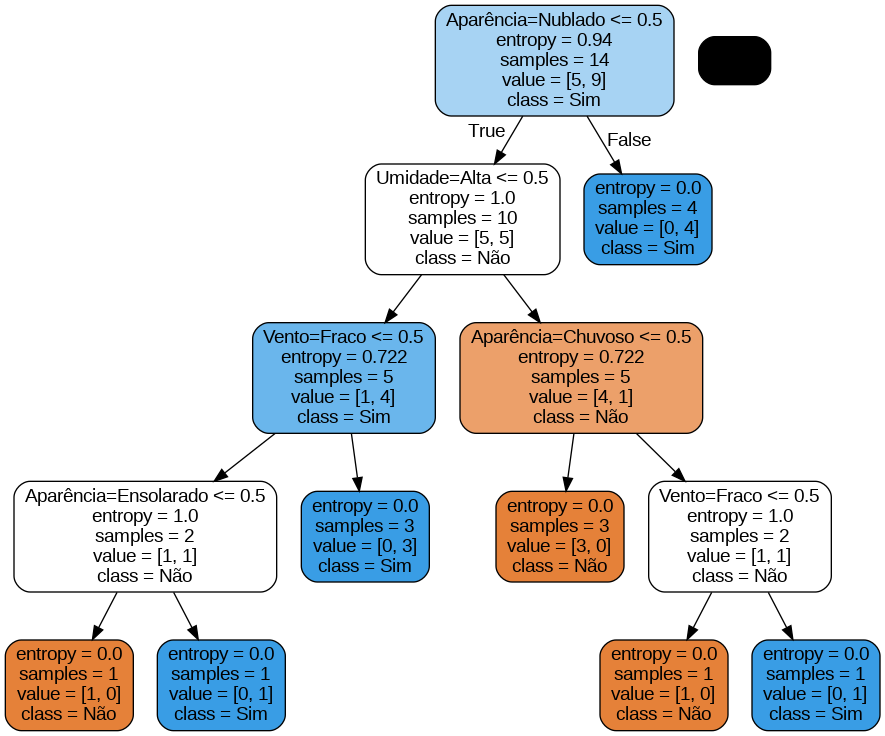

In [41]:
import pydotplus
from IPython.display import Image
# Create DOT data
dot_data = tree.export_graphviz(treeClima, out_file=None,
                                feature_names=vect.feature_names_,
                                rounded =True,
                                filled=True,
                                class_names=le.classes_)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())
